<html>
<table width="100%" cellspacing="2" cellpadding="2" border="1">
<tbody>
<tr>
<td valign="center" align="center" width="25%"><img src="../../media/decartes.jpg"
alt="DeCART Icon" width="128" height="171"><br>
</td>
<td valign="center" align="center" width="75%">
<h1 align="center"><font size="+1">DeCART Summer School<br>
for<br>
Biomedical Data Science</font></h1></td>
<td valign="center" align="center" width="25%"><img
src="../../media/U_Health_stacked_png_red.png" alt="Utah Health
Logo" width="128" height="134"><br>
</td>
</tr>
</tbody>
</table>
<br>
</html>

# Visualizing Numeric Data

In [1]:
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
DATADIR = os.path.join(os.path.expanduser("~"),"DATA")

## [Matplotlib](http://matplotlib.org)

Matplotlib is the againg yet competent graphing package that is part of the "scipy stack." Matplotlib focuses on 2D visualizations but it does come with a 3D visualization module that can be used interactively (but not through the notebook).

NetworkX and Pandas both use matplotlib as their default drawing packages for quick visualization of data.

Matplotlib plots can be customized with a fairly flexible api.

For the most part, the best way to learn Matplotlib is to find an example from the [gallery](http://matplotlib.org/gallery.html)


The following cell is an exmaple of a **notebook magic**. This particular magic is telling the matplotlib package to draw in the notebook rather than trying to open a separate Python window to draw in.

In [3]:
%matplotlib inline

## Using [glob](https://docs.python.org/3/library/glob.html) and [os.listdir](https://docs.python.org/3/library/os.html)

It is desirable to make our code as platform independent as possible and also to be able to 

In [4]:
HRDIR = os.path.join(DATADIR,"Numerics", "mimic2", "hr", "subjects")
BPDIR = os.path.join(DATADIR,"Numerics","mimic2","bp", "subjects")
hr_files = os.listdir(HRDIR)
bp_files = os.listdir(BPDIR)

In [8]:
os.listdir(HRDIR)

['18441.txt',
 '5235.txt',
 '13514.txt',
 '3122.txt',
 '17000.txt',
 '2228.txt',
 '1721.txt',
 '3888.txt',
 '6700.txt',
 '3678.txt',
 '22087.txt',
 '20848.txt',
 '24390.txt',
 '12622.txt',
 '6099.txt',
 '22078.txt',
 '25717.txt',
 '29893.txt',
 '26578.txt',
 '19978.txt',
 '29663.txt',
 '26550.txt',
 '538.txt',
 '9396.txt',
 '10784.txt',
 '24435.txt',
 '16487.txt',
 '5989.txt',
 '10579.txt',
 '17216.txt',
 '6258.txt',
 '1537.txt',
 '11101.txt',
 '11115.txt',
 '1245.txt',
 '9157.txt',
 '10545.txt',
 '921.txt',
 '12434.txt',
 '6516.txt',
 '10237.txt',
 '16646.txt',
 '19213.txt',
 '10551.txt',
 '21954.txt',
 '11897.txt',
 '23170.txt',
 '2943.txt',
 '22508.txt',
 '9816.txt',
 '13919.txt',
 '2957.txt',
 '16861.txt',
 '5786.txt',
 '25515.txt',
 '14910.txt',
 '10586.txt',
 '21983.txt',
 '20445.txt',
 '11698.txt',
 '15398.txt',
 '13931.txt',
 '8301.txt',
 '19429.txt',
 '3526.txt',
 '2638.txt',
 '24964.txt',
 '5619.txt',
 '10431.txt',
 '3268.txt',
 '19373.txt',
 '17438.txt',
 '14125.txt',
 '2395

## list (collection) length

Python has a function [``len``]() that returns the length of a list or any other collection. This will be something we will use frequently.

In this case, we need to see how many heart rate files we read

In [11]:
print(len(hr_files))
print(hr_files[-1])

3903
16475.txt


In [12]:
hr = pd.read_table(os.path.join(HRDIR, hr_files[-1]), 
                   header=None, names=["heart rate"])
print(hr.shape)
hr.head()

(56, 1)


,heart rate
0,90
1,89
2,91
3,87
4,85


## [``plot()``](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html)


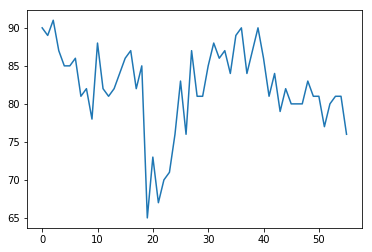

In [13]:
hr["heart rate"].plot()

## [Matplotlib Color](http://matplotlib.org/api/colors_api.html)

Unless we tell it otherwise, Pandas will use default colors for the plot. However, we can specify the colors ourselves. Matplotlib has a small set of named colors that can be specified by name or a single letter, for example ``'r'`` (``'red'``) or ``'k'`` (``'black'``). Matplotlib also recognizes [HTML named colors](https://www.w3schools.com/colors/colors_names.asp).



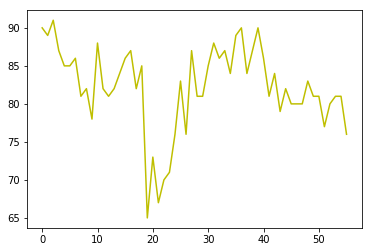

In [14]:
hr["heart rate"].plot(color='y')

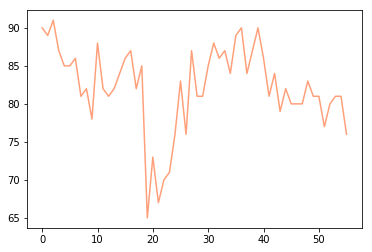

In [15]:
hr["heart rate"].plot(color="LightSalmon")

## [RGB$\alpha$ Color](https://en.wikipedia.org/wiki/RGBA_color_space)

There are many ways to represent colro numerically. One of the simplest models of color is the **R**ed, **G**reen, **B**lue (**RGB**). This color model uses numbers to represent the portion of red, green, and blue light that form the color. Matplotlib uses a three-tuple of numbers between zero and one in a tuple to represent a color. 1 is the maximum amount of color and zero is the minimum. (1,1,1) is white, (0,0,0) is black, and (1,0,0) is red, for example. We can add a fourth number of represent the transparency if the color: 1 is fully opaque and 0 is fully transparent.

## Example

Plot the heart rate with the color red and an $\alpha=0.25$.

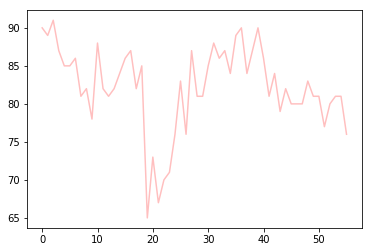

In [16]:
hr["heart rate"].plot(color=(1,0,0, 0.25))

(40, 150)

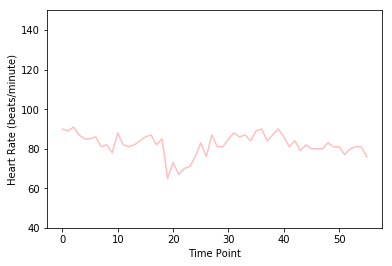

In [17]:
fig1, ax1 = plt.subplots(1)
hr["heart rate"].plot(color=(1,0,0, 0.25), ax=ax1)
ax1.set_xlabel("Time Point")
ax1.set_ylabel("Heart Rate (beats/minute)")
ax1.set_ylim((40, 150))

## Visualizing Blood Pressures

Read in the blood pressure data for patient ``1000.txt`` and plot the systolic values.

In [19]:
os.path.join(BPDIR, "1000.txt")

'/home/jovyan/DATA/Numerics/mimic2/bp/subjects/1000.txt'

In [22]:
bp = pd.read_table(os.path.join(BPDIR, "1000.txt"), 
                   header=None, names=["systolic", 
                                       "diastolic"])
#bp["systolic"].plot()
bp["systolic"].plot()

TypeError: Empty 'DataFrame': no numeric data to plot

### What went wrong? How can our data not be numeric?

In a terminal open the data file with ``vim`` and go to line 753.

#### What do you find?

#### Dealing with Missing Values

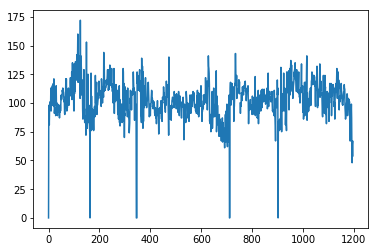

In [23]:
bp = pd.read_table(os.path.join(BPDIR, "1000.txt"), 
                   header=None, names=["systolic", "diastolic"], 
                   na_values=["None"])
bp["systolic"].plot()

#### We can plot the whole DataFrame

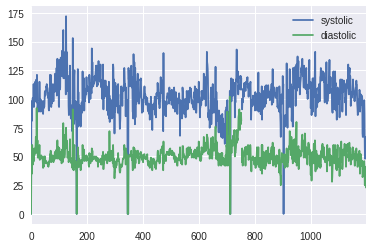

In [14]:
bp.plot()

## Using an axis

We can create an axis and pass this as a keyword argument to our plotting methods. We can then use the axis object to configure the graph.

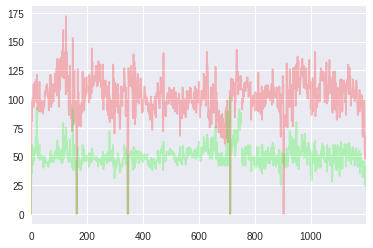

In [15]:
fig2, ax2 = plt.subplots(1)
bp["systolic"].plot(color=(1,0,0, 0.25), ax=ax2)
bp["diastolic"].plot(color=(0,1,0, 0.25), ax=ax2)


## Exercise

Create a [histogram](https://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization-hist) of the systolic and diastolic blood pressures. Create an axis. Use the axis to set the label for the x axis and to draw a legend. Pick interesting colors.

Compare your plot to drawing a histogram of the DataFrame.

## [Seaborn](https://stanford.edu/~mwaskom/software/seaborn/)

We have been using matplotlib for our visualization. This is the workhorse of Python visualization although there are important alternatives, including [Bokeh](http://bokeh.pydata.org/en/latest/), [cairo](http://cairographics.org/), [datashader](http://datashader.readthedocs.io/en/latest/), [graphite (time series data)](http://graphite.readthedocs.io/en/latest/). [Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a statistical visualization program that is built on top of Matplotlib. Since statistical exploration of our data is a primary task in data science, seaborn can be a very useful tool in this domain. Seaborn seems to work best with [Pandas](http://pandas.pydata.org/), but can be used directly with numpy arrays. Here we provide an example using our blood pressure data.

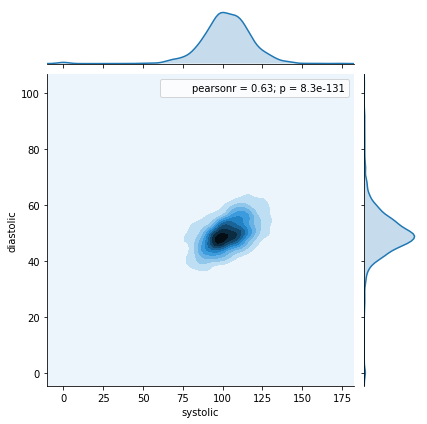

In [24]:
import seaborn as sns
sns.jointplot(bp["systolic"], bp["diastolic"], kind='kde')

### List Comprehension

In [25]:
all_bp = [pd.read_table(os.path.join(BPDIR, f), 
              header=None, 
              names=["systolic", "diastolic"], 
              na_values=["None"]) for f in bp_files]
all_bp[0].head()

,systolic,diastolic
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


In [26]:
summary_data = [(bp["systolic"].mean(), 
                 bp["diastolic"].mean(), 
                 np.sqrt(bp["systolic"].std()*bp["diastolic"].std())) for bp in all_bp]

In [27]:
sdata = np.array(summary_data)
sdata.shape

(3876, 3)

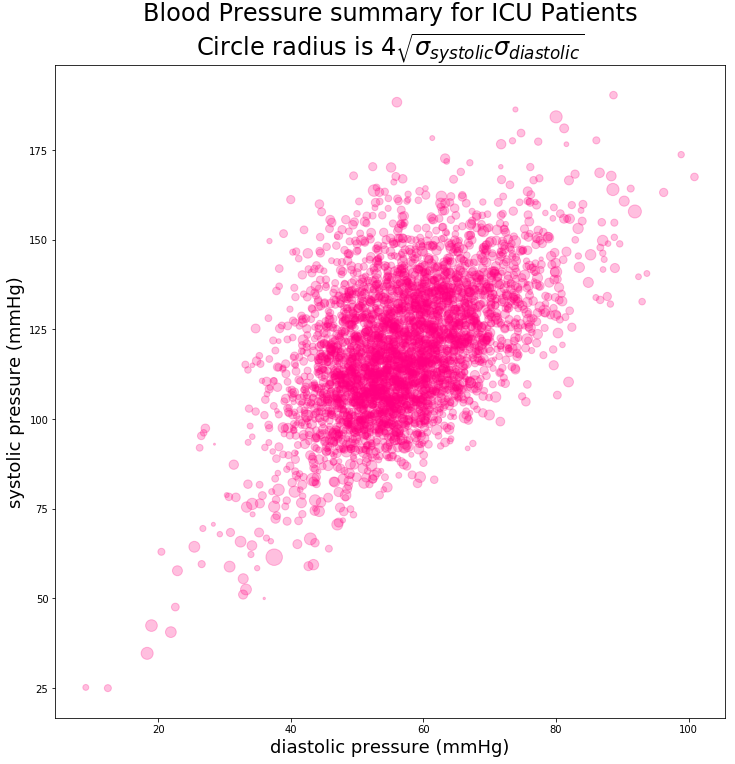

In [28]:
fig_summary, ax_summary = plt.subplots(1)
fig_summary.set_size_inches(12,12)
ax_summary.scatter(sdata[:,1], sdata[:,0], marker='o', s= 4*sdata[:,2], alpha=0.25, c=(1,0,0.5))
ax_summary.set_xlabel("diastolic pressure (mmHg)", fontsize=18)
ax_summary.set_ylabel("systolic pressure (mmHg)", fontsize=18)
ax_summary.set_title("Blood Pressure summary for ICU Patients\nCircle radius is 4$\sqrt{\sigma_{systolic}\sigma_{diastolic}}$",
                    fontsize=24)
fig_summary.savefig("blood_pressure_summary.png", dpi=600)

## Exercise 1.

Visualize the blood pressure data using a scatter plot with the following characteristics:

1. The x-location is the mean diastolic blood pressure for the patient
1. The y-location is the mean systolic blood pressure for the patient
1. The size of the circular marker is proportional to the [geometric mean](https://en.wikipedia.org/wiki/Geometric_mean) of the systolic and diastolic standard deviations
1. Colors are randomly selected for each marker

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">DeCART</span> by <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Brian E. Chapman</span> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.

In [22]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, hold=None, data=None, **kwargs)
    Make a scatter plot of `x` vs `y`
    
    Marker size is scaled by `s` and marker color is mapped to `c`
    
    Parameters
    ----------
    x, y : array_like, shape (n, )
        Input data
    
    s : scalar or array_like, shape (n, ), optional
        size in points^2.  Default is `rcParams['lines.markersize'] ** 2`.
    
    c : color, sequence, or sequence of color, optional, default: 'b'
        `c` can be a single color format string, or a sequence of color
        specifications of length `N`, or a sequence of `N` numbers to be
        mapped to colors using the `cmap` and `norm` specified via kwargs
        (see below). Note that `c` should not be a single numeric RGB or
        RGBA sequence because that is indistinguishable from an array 